In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data=pd.read_csv("/content/DisasterWeatherNoDuplicates.csv")
data.head()

,state,declarationType,incidentType,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,fipsStateCode,fipsCountyCode,designatedArea,combinedFIPS,State Code,year,Month,Precipitation,Cooling_Days,Heating_Days,AverageTemp
0,NM,FM,Fire,0,0,1,1,35,33,Mora (County),35033,35,2023,5,1.19,10,263,56.8
1,NM,FM,Fire,0,0,1,1,35,47,San Miguel (County),35047,35,2023,5,1.19,10,245,57.4
2,RI,FM,Fire,0,0,1,1,44,9,"Washington (County)(in (P)MSA 5520,6480)",44009,44,2023,4,5.04,8,224,57.8
3,NE,FM,Fire,0,0,1,1,31,25,Cass (County),31025,31,2023,4,6.22,13,177,59.6
4,NM,FM,Fire,0,0,1,1,35,57,Torrance (County),35057,35,2023,4,13.48,0,619,44.4


In [3]:
df=data.copy()
df=df.drop_duplicates()
df.isna().sum()

,0
state,0
declarationType,0
incidentType,0
ihProgramDeclared,0
iaProgramDeclared,0
paProgramDeclared,0
hmProgramDeclared,0
fipsStateCode,0
fipsCountyCode,0
designatedArea,0


In [4]:
X = df.drop('incidentType', axis=1)  
Y = df['incidentType'].unique()  
features=df.columns
print(features)
X.head()
print(len(X.columns))
print(Y)


Index(['state', 'declarationType', 'incidentType', 'ihProgramDeclared',
       'iaProgramDeclared', 'paProgramDeclared', 'hmProgramDeclared',
       'fipsStateCode', 'fipsCountyCode', 'designatedArea', 'combinedFIPS',
       'State Code', 'year', 'Month', 'Precipitation', 'Cooling_Days',
       'Heating_Days', 'AverageTemp'],
      dtype='object')
17
['Fire' 'Severe Storm' 'Flood' 'Tornado' 'Winter Storm' 'Snowstorm'
 'Hurricane' 'Tropical Storm' 'Coastal Storm' 'Other' 'Severe Ice Storm'
 'Dam/Levee Break' 'Biological' 'Volcanic Eruption' 'Mud/Landslide'
 'Earthquake' 'Terrorist' 'Drought' 'Toxic Substances' 'Fishing Losses'
 'Human Cause' 'Tsunami' 'Freezing' 'Typhoon']


Feature Importances (Importance > 0.01):
              Feature  Importance
11               year    0.345343
12              Month    0.254939
1     declarationType    0.098181
6       fipsStateCode    0.046706
9        combinedFIPS    0.046503
15       Heating_Days    0.033663
0               state    0.032354
13      Precipitation    0.029333
10         State Code    0.025266
16        AverageTemp    0.024153
14       Cooling_Days    0.022767
3   iaProgramDeclared    0.011063


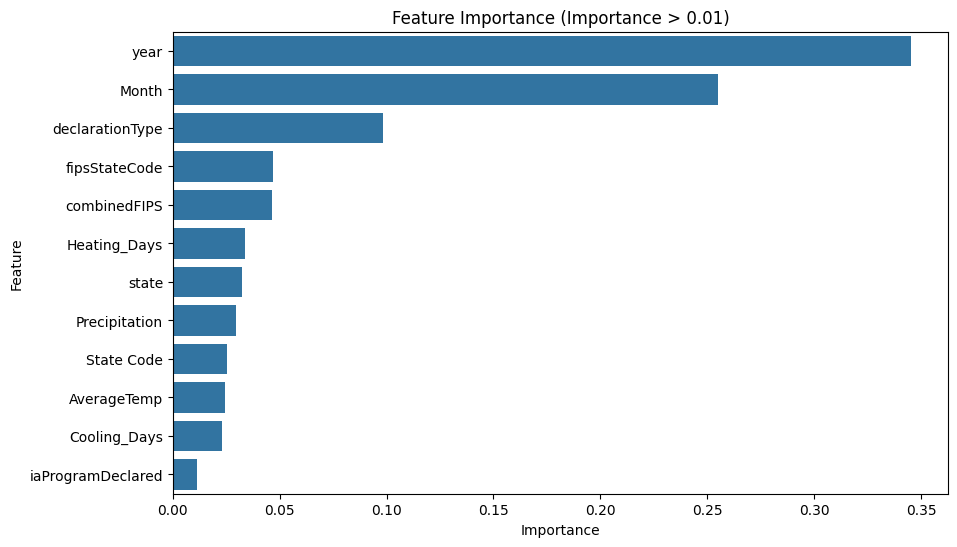

32796
32796


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

categorical_cols = ['state', 'declarationType', 'incidentType', 'designatedArea', 'State Code', 'Month']
for col in categorical_cols:
    df[col] = pd.Categorical(df[col]).codes

X = df.drop('incidentType', axis=1) 
y = df['incidentType']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

importances = dtree.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

threshold = 0.01  

important_features_df = feature_importance_df[feature_importance_df['Importance'] > threshold].sort_values(by='Importance', ascending=False)

print(f"Feature Importances (Importance > {threshold}):")
print(important_features_df)

plt.figure(figsize=(10, 6))
sns.barplot(data=important_features_df, x='Importance', y='Feature')
plt.title(f'Feature Importance (Importance > {threshold})')
plt.show()

print(len(X))
print(len(y))

In [8]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

imp_features=important_features_df["Feature"]
X = df.loc[:, imp_features]
print(len(X))
print(len(y))

class_counts = df['incidentType'].value_counts()

classes_to_keep = class_counts[class_counts > 2].index

df = df[df['incidentType'].isin(classes_to_keep)]


print("Original class distribution:", y.value_counts())

categorical_cols = ['state', 'declarationType', 'State Code', 'Month']
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42, k_neighbors=1)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Resampled class distribution:", pd.Series(y_train_res).value_counts())


32796
32796
Original class distribution: incidentType
13    9718
10    6366
7     5180
0     3915
14    1912
12    1655
5     1578
16     911
3      506
1      470
11     229
8      165
21      48
18      44
6       33
4       26
20      12
17       7
19       7
9        6
15       4
2        4
Name: count, dtype: int64
Resampled class distribution: incidentType
13    6864
12    6864
2     6864
15    6864
20    6864
19    6864
4     6864
9     6864
18    6864
6     6864
3     6864
1     6864
8     6864
16    6864
5     6864
11    6864
14    6864
0     6864
21    6864
7     6864
10    6864
17    6864
Name: count, dtype: int64


In [9]:
def add_laplace_noise(data, sensitivity, epsilon):
    scale = sensitivity / epsilon
    noise = np.random.laplace(0, scale, data.shape)
    noisy_data = data + noise
    return noisy_data

def evaluate_utility(noisy_X_train, noisy_X_test, y_train, y_test):
    clf = RandomForestClassifier(random_state=42)
    clf.fit(noisy_X_train, y_train)
    y_pred = clf.predict(noisy_X_test)
    return accuracy_score(y_test, y_pred)

In [10]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder



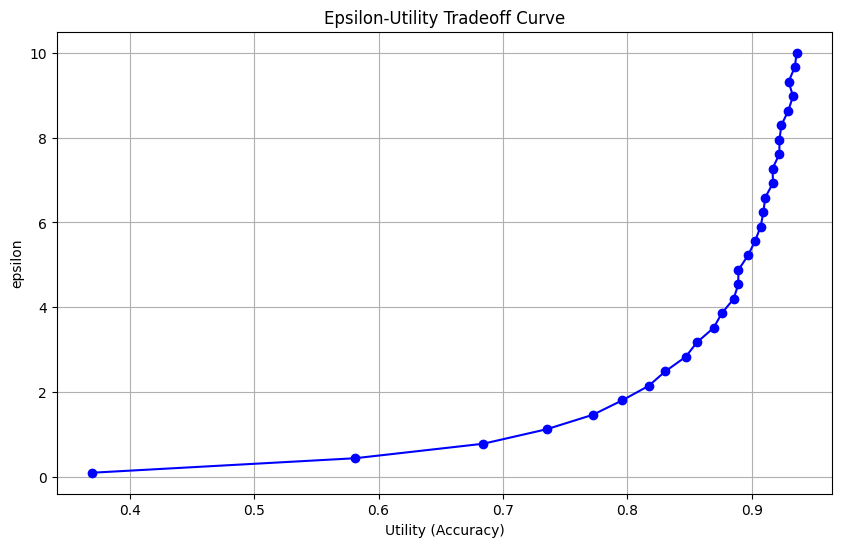

Optimal Epsilon: 10.0


In [11]:
from sklearn.metrics import accuracy_score

sensitivity = 2
epsilon_values = np.linspace(0.1, 10, 30)
accuracies = []


for epsilon in epsilon_values:
    noisy_X_train = add_laplace_noise(X_train_res, sensitivity, epsilon)
    noisy_X_test = add_laplace_noise(X_test, sensitivity, epsilon)
    accuracy = evaluate_utility(noisy_X_train, noisy_X_test, y_train_res, y_test)
    accuracies.append(accuracy)


plt.figure(figsize=(10,6))
plt.plot(accuracies, epsilon_values, marker='o', linestyle='-', color='blue')
plt.xlabel('Utility (Accuracy)')
plt.ylabel('epsilon')
plt.title('Epsilon-Utility Tradeoff Curve')
plt.grid(True)
plt.show()


optimal_index = np.argmax(accuracies)
optimal_epsilon = epsilon_values[optimal_index]

print(f"Optimal Epsilon: {optimal_epsilon}")

In [12]:
from sklearn.preprocessing import StandardScaler
noisy_X_train = add_laplace_noise(X_train, sensitivity, optimal_epsilon)
noisy_X_test = add_laplace_noise(X_test, sensitivity, optimal_epsilon)
sc=StandardScaler()
X_train_scaled = sc.fit_transform(noisy_X_train)
X_test_scaled = sc.transform(noisy_X_test)

In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
accuracy = model.score(X_test_scaled, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.94


In [17]:

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd 

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_train)

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')

xgb_model.fit(X_train_scaled, y_encoded)

y_pred = xgb_model.predict(X_test_scaled)

y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(y_test)

print("Accuracy:", accuracy_score(y_test_labels, y_pred_labels))
print("Classification Report:\n", classification_report(y_test_labels, y_pred_labels))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:59:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9337331029576177
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1172
           1       0.96      0.83      0.89       154
           2       0.00      0.00      0.00         2
           3       0.95      0.96      0.96       149
           4       1.00      0.09      0.17        11
           5       0.95      0.94      0.95       483
           6       1.00      0.58      0.74        12
           7       0.89      0.90      0.89      1572
           8       0.94      0.91      0.92        54
          10       0.97      0.98      0.97      1939
          11       0.96      0.82      0.89        57
          12       0.97      0.91      0.94       516
          13       0.90      0.95      0.93      2854
          14       0.94      0.89      0.91       563
          16       0.87      0.68      0.76       263
          17       0.00      0.00      0.00         4
          18       1.00     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=3341fae170c68535cc3d7a80cda1c9ffc90124706b10b042a09aa879250b8996
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [22]:
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(X_train_scaled,
                                               feature_names=features,
                                               class_names=Y,
                                               mode='classification')

i = 0
exp = explainer.explain_instance(X_test_scaled[i], xgb_model.predict_proba)

exp.show_in_notebook(show_table=True)


PermutationExplainer explainer: 9840it [2:27:11,  1.11it/s]



SHAP Summary Plot for Class 0 (Fire)


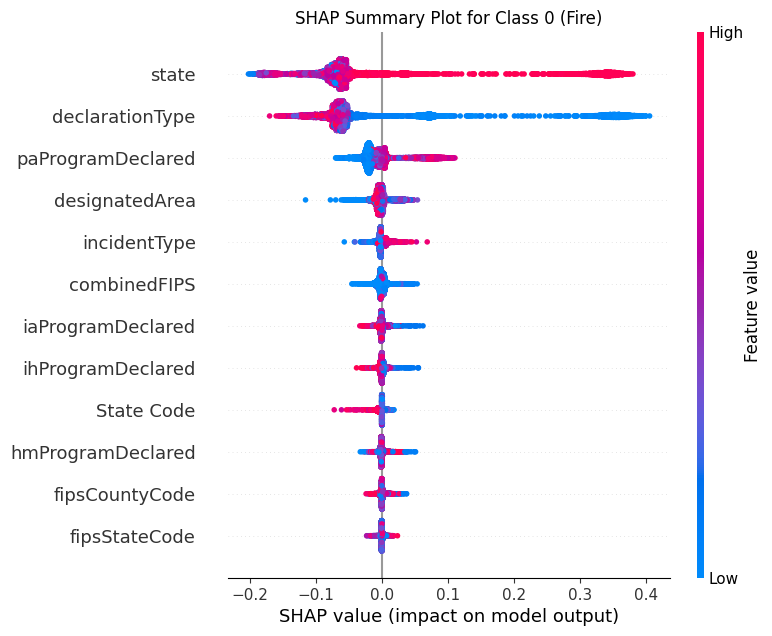


SHAP Summary Plot for Class 1 (Severe Storm)


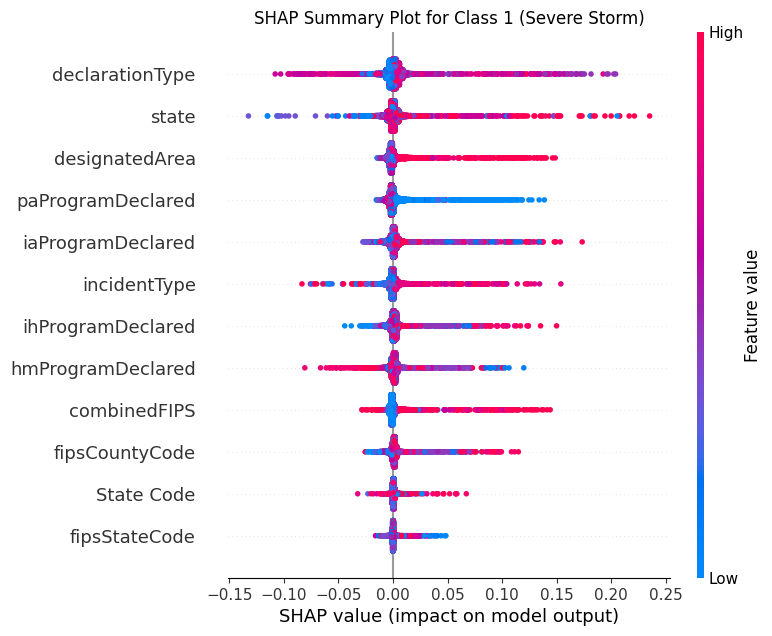


SHAP Summary Plot for Class 2 (Flood)


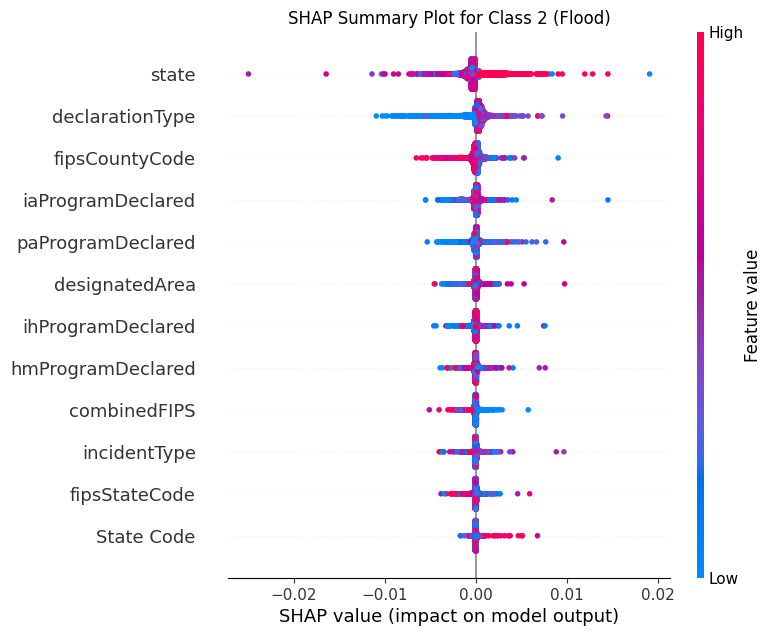

In [23]:
import shap
import lime
import lime.lime_tabular

explainer = shap.Explainer(model.predict_proba, X_train_scaled)
shap_values = explainer(X_test_scaled)

for class_label in range(3):
  print(f"\nSHAP Summary Plot for Class {class_label} ({Y[class_label]})")

  class_shap_values = shap_values.values[:, :, class_label]
  shap.summary_plot(class_shap_values, X_test_scaled,
                    feature_names=features, show=False)
  plt.title(f"SHAP Summary Plot for Class {class_label} ({Y[class_label]})")
  plt.show()